# **「PyTorch入門 4. モデル構築」**

## **ニューラルネットワークモデルの作り方**(神经网络模型的制作方法)
神经网络通过大量的layer(层)的数据运算组成

``torch.nn``中提供的类和函数涵盖了构建神经网络所需的组件

PyTorch中所有的模块都在，``nn.Module``中继承

In [ ]:
%matplotlib inline

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## **訓練に使用するデバイス** (训练时使用的设备)
GPU，CPU通过``torch.cuda``的结果进行判断

In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

print('Using {} device'.format(device))

Using cuda device


## **クラスの定義**(类的定义)
继承自``nn.Module``，定义单独的network model(网络模块)，network layer(网络层)通过``__inin__``初始化

继承自 nn.Module 的模块，都有一个 forward 函数，它是输入数据的前向传播函数(順伝搬関数)。

In [ ]:
class NeuralNetwork(nn.Module):

    # 定义__init__()构造函数
    def __init__(self):

        # 调用父类的构造函数，确保父类nn.Module的初始化也被执行
        super(NeuralNetwork, self).__init__()

        # 定义了一个扁平化层，将输入的28x28图像转换为784维的一维向量
        # 第0维度代表样本编号，该维度不会通过nn.Flatten发生变化
        self.flatten = nn.Flatten()


        # 定义了一系列线性层和ReLU激活函数组成的顺序容器（sequential container）
        self.linear_relu_stack = nn.Sequential(

            # 第一个线性层，将输入的784维向量映射到512维
            nn.Linear(28*28, 512),
            # 一个ReLU激活函数，应用非线性变换
            nn.ReLU(),

            # 第二个线性层，将512维向量映射到另一个512维向量
            nn.Linear(512, 512),
            # 再次应用nn.ReLU()
            nn.ReLU(),

            # 第三个线性层，将512维向量映射到10维向量
            nn.Linear(512, 10),
            # 再应用一次nn.ReLU()非线性变换。
            nn.ReLU()
        )

    def forward(self, x):

        # 扁平化输入
        x = self.flatten(x)

        # 将扁平化后的向量通过定义的线性和ReLU层的堆栈
        logits = self.linear_relu_stack(x)

        # 返回最终的输出
        return logits

制作NeuralNetwork类的实例,将去移动至device上

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


如果想使用这个模型，必须要输入数据

数据输入到模型后，将由forward函数进行处理，并执行一些background operation(后台操作)

因此不要通过model.forword来处理输入的数据


向这个model输入数据后，将返回一个包含各个类所生成预测值的10维张量

将这一输出结果输入``nn.Softmax``模块，就能确定输入每个类别数据的预测概率

In [ ]:
X = torch.rand(1, 28, 28, device=device)
# print(X)

# 将数据输入到model中
logits = model(X)


pred_probab = nn.Softmax(dim=1)(logits)
# 在类别维度（dim=1）上应用 Softmax 函数
# 将 logits 转换为概率分布


y_pred = pred_probab.argmax(1)
# 在类别维度上（即每行）找出最大概率的索引（类别）。对于每个样本，这个索引就是模型预测的类别。

print(f"Predicted class: {y_pred}")

Predicted class: tensor([3], device='cuda:0')


## **モデルレイヤー**(model layer)

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


**nn.Flatten()**

In [ ]:
# 定义了一个扁平化层，将输入的28x28图像转换为784维的一维向量
# 第0维度代表样本编号，该维度不会通过nn.Flatten发生变化
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


**nn.Linear**

linear layer进行线性变换

线性层包含权重和偏置(bias)参数。

In [ ]:
# 将28*28的数据映射到20维的一维向量
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


**nn.ReLU**

非线性激活函数

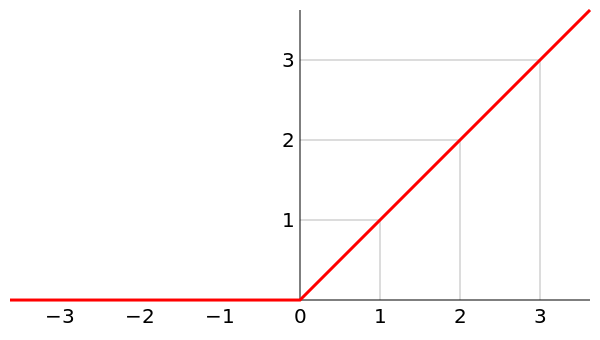

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.3518, -0.1147,  0.2761, -0.1023, -0.0530, -0.3056, -0.1412, -0.2549,
          0.5346, -0.5076,  0.3873, -0.6471, -0.1312,  0.1404, -0.1350, -0.1690,
         -0.2338, -0.2074,  0.5483, -0.2447],
        [ 0.0228, -0.1360, -0.3984, -0.0857, -0.0213, -0.0455, -0.2454, -0.2810,
          0.3777, -0.5516, -0.0235, -0.9292, -0.3812,  0.3585, -0.0170, -0.4094,
         -0.3543, -0.2621,  0.8452, -0.3791],
        [ 0.1647, -0.1901,  0.0571,  0.1492, -0.0027,  0.1731,  0.1919,  0.2077,
          0.6058, -0.4168,  0.2431, -0.8795, -0.3380,  0.2074,  0.3357, -0.0702,
         -0.3037, -0.2584,  0.5788, -0.3034]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.3518, 0.0000, 0.2761, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5346,
         0.0000, 0.3873, 0.0000, 0.0000, 0.1404, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5483, 0.0000],
        [0.0228, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3777,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3585, 0.00

**nn.Softmax**

在类别维度（dim=1）上应用 Softmax 函数

将 logits[- ∞, ∞] 转换为概率分布[0,1]

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab)

tensor([[0.0968, 0.1052, 0.0968, 0.1055, 0.0968, 0.0968, 0.1026, 0.1008, 0.1019,
         0.0968]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


## **モデルパラメータ**(模型的参数)

权重，偏置(bias)参数 在训练时用于最适化

通过``parameters()``和``named_parameters()``访问各层的所有参数

In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0021,  0.0259, -0.0056,  ..., -0.0251, -0.0284,  0.0158],
        [ 0.0074,  0.0307,  0.0048,  ..., -0.0074,  0.0262, -0.0048]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0076, -0.0324], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0227,  0.0255,  0.0426,  ...,  0.0142, -0.0337, -0.0177],
        [ 0.0071, -0.0350, -0.0345,  ..., -0.0050, -0.0252,  0.0258]],
       device='cu